In [1]:
import os

import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Patch

In [2]:
def load_model_grouped(csv_path: str, fault_num: int):
    df = pd.read_csv(csv_path)
    df["family"] = df["family"].apply(lambda x: "SwinV2" if x == "Swin" else "EVA2" if x == "EVA" else x)
    md_gp = df.groupby(["board", "family", "config", "hardening", ]).sum()
    # model_grouped["SDC"] = (model_grouped["SDC"] - model_grouped["critical_SDC"]).abs()
    md_gp["#faults"] = fault_num
    md_gp["PVF Tolerable SDC"] = md_gp["SDC"] / md_gp["#faults"]
    md_gp["PVF Critical SDC"] = md_gp["critical_SDC"] / md_gp["#faults"]
    md_gp["PVF DUE"] = md_gp["DUE"] / md_gp["#faults"]
    return md_gp

In [3]:
# Load full logs
model_grouped = load_model_grouped(csv_path="all_failures_database.csv", fault_num=1750)
# model_grouped = load_model_grouped(csv_path="all_failures_database_150fi.csv", fault_num=1050)

In [4]:
model_grouped = model_grouped.reindex(
    ["Unhardened", "Hardened"], level="hardening"
).reindex(
    ["Original ViT", "EVA2", "SwinV2", "MaxViT"], level="family"
).reindex(
    ["BS32-224", "B16-224", "B16-384", "L14-224", "H14-224", "B14-448", "L14-448", "B256", "B384", "L256", "L384",
     "L512"], level="config"
)

In [5]:
model_grouped

SDC  critical_SDC  DUE  #faults  \
board  family       config   hardening                                     
Ampere Original ViT BS32-224 Unhardened  547            99   36     1750   
                             Hardened    626            52   38     1750   
                    B16-224  Unhardened  545           112   43     1750   
                             Hardened    632            56   35     1750   
                    B16-384  Unhardened  486           133   45     1750   
                             Hardened    552            61   35     1750   
                    L14-224  Unhardened  428           101   25     1750   
                             Hardened    550            31   31     1750   
                    H14-224  Unhardened  436           106   37     1750   
                             Hardened    526            29   32     1750   
       EVA2         B14-448  Unhardened  342           226   35     1750   
                             Hardened    546            21   40     1750   
                    L14-448  Unhardened  274           238   59     1750   
                             Hardened    472            37   44     1750   
       SwinV2       B256     Unhardened  516            48   53     1750   
                             Hardened    544            48   50     1750   
                    B384     Unhardened  415            28   65     1750   
                             Hardened    403            28   62     1750   
                    L256     Unhardened  514            48   49     1750   
                             Hardened    503            23   51     1750   
       MaxViT       L384     Unhardened  255           277   42     1750   
                             Hardened    379           149   50     1750   
                    L512     Unhardened  273           263   50     1750   
                             Hardened    407           143   35     1750   
Pascal Original ViT BS32-224 Unhardened  625           136   30     1750   
                             Hardened    738            62   40     1750   
                    B16-224  Unhardened  616           130   34     1750   
                             Hardened    645            57   45     1750   
                    B16-384  Unhardened  534           159   26     1750   
                             Hardened    627            62   35     1750   
                    L14-224  Unhardened  511           107   22     1750   
                             Hardened    584            39   26     1750   
                    H14-224  Unhardened  482           110   22     1750   
                             Hardened    581            30   13     1750   
       EVA2         B14-448  Unhardened  321           275   48     1750   
                             Hardened    546            33   50     1750   
                    L14-448  Unhardened  298           266   35     1750   
                             Hardened    523            25   31     1750   
       SwinV2       B256     Unhardened  599            44   84     1750   
                             Hardened    585            41   69     1750   
                    B384     Unhardened  428            46   73     1750   
                             Hardened    474            30   59     1750   
                    L256     Unhardened  567            38   49     1750   
                             Hardened    609            31   67     1750   
       MaxViT       L384     Unhardened  128           278   65     1750   
                             Hardened    309           143   44     1750   
                    L512     Unhardened  136           306   44     1750   
                             Hardened    304           149   60     1750   

                                         PVF Tolerable SDC  PVF Critical SDC  \
board  family       config   hardening                                         
Ampere Original ViT BS32-224 Unhardened           0.312571          0.056571   


In [6]:
pvf_reduced = model_grouped[["PVF Tolerable SDC", "PVF Critical SDC", "PVF DUE"]]

In [7]:
pvf_reduced

PVF Tolerable SDC  PVF Critical SDC  \
board  family       config   hardening                                         
Ampere Original ViT BS32-224 Unhardened           0.312571          0.056571   
                             Hardened             0.357714          0.029714   
                    B16-224  Unhardened           0.311429          0.064000   
                             Hardened             0.361143          0.032000   
                    B16-384  Unhardened           0.277714          0.076000   
                             Hardened             0.315429          0.034857   
                    L14-224  Unhardened           0.244571          0.057714   
                             Hardened             0.314286          0.017714   
                    H14-224  Unhardened           0.249143          0.060571   
                             Hardened             0.300571          0.016571   
       EVA2         B14-448  Unhardened           0.195429          0.129143   
                             Hardened             0.312000          0.012000   
                    L14-448  Unhardened           0.156571          0.136000   
                             Hardened             0.269714          0.021143   
       SwinV2       B256     Unhardened           0.294857          0.027429   
                             Hardened             0.310857          0.027429   
                    B384     Unhardened           0.237143          0.016000   
                             Hardened             0.230286          0.016000   
                    L256     Unhardened           0.293714          0.027429   
                             Hardened             0.287429          0.013143   
       MaxViT       L384     Unhardened           0.145714          0.158286   
                             Hardened             0.216571          0.085143   
                    L512     Unhardened           0.156000          0.150286   
                             Hardened             0.232571          0.081714   
Pascal Original ViT BS32-224 Unhardened           0.357143          0.077714   
                             Hardened             0.421714          0.035429   
                    B16-224  Unhardened           0.352000          0.074286   
                             Hardened             0.368571          0.032571   
                    B16-384  Unhardened           0.305143          0.090857   
                             Hardened             0.358286          0.035429   
                    L14-224  Unhardened           0.292000          0.061143   
                             Hardened             0.333714          0.022286   
                    H14-224  Unhardened           0.275429          0.062857   
                             Hardened             0.332000          0.017143   
       EVA2         B14-448  Unhardened           0.183429          0.157143   
                             Hardened             0.312000          0.018857   
                    L14-448  Unhardened           0.170286          0.152000   
                             Hardened             0.298857          0.014286   
       SwinV2       B256     Unhardened           0.342286          0.025143   
                             Hardened             0.334286          0.023429   
                    B384     Unhardened           0.244571          0.026286   
                             Hardened             0.270857          0.017143   
                    L256     Unhardened           0.324000          0.021714   
                             Hardened             0.348000          0.017714   
       MaxViT       L384     Unhardened           0.073143          0.158857   
                             Hardened             0.176571          0.081714   
                    L512     Unhardened           0.077714          0.174857   
                             Hardened             0.173714          0.085143   

                                        

In [8]:
with pd.ExcelWriter("~/temp/pvf_parsed_tmp.xlsx") as writer:
    model_grouped.to_excel(writer, sheet_name="raw_data")
    pvf_reduced.to_excel(writer, sheet_name="PVF")

In [9]:
sns.set_style("whitegrid")
sns.set_color_codes("pastel")

In [10]:
def plot_figure(board):
    # set the figure size
    fig, ax = plt.subplots(figsize=(12, 4.2))
    pvf = pvf_reduced.loc[pd.IndexSlice[board, :, :, :]].droplevel("board").reset_index()
    margin = 0.04
    width = 0.45
    bar_width = 0.35
    configs = pvf["config"].unique()
    families = pvf["family"].unique()
    x_indexes = np.arange(configs.size) - width / 2
    x_indexes_dict = dict(zip(configs, x_indexes))
    print(families)
    font_size = 19
    y_tick_step = 10
    max_y_value = round(pvf_reduced.sum(axis=1).max() * 10) * 10
    y_ticks = np.arange(0, max_y_value + y_tick_step, y_tick_step)
    print(y_ticks)
    line_width = 1
    temp_file = f"/tmp/{board}_pvf.pdf"
    final_file = f"/home/fernando/git_research/date_2024_vits/fig/pvf_{board.lower()}.pdf"
    # SDC on the ppt 132 151 176
    # critical 251 209 245 
    # DUE 255 217 102
    tol_sdc_color = (132 / 255, 151 / 255, 176 / 255)  # "#44a5c2"
    cri_sdc_color = (251 / 255, 209 / 255, 245 / 255)  # "#ffae49"
    due_color = (255 / 255, 217 / 255, 102 / 255)  # "#aaae49"
    y_subsection_pos = -0.13

    hatch_pattern = '///'
    alpha_set = 0.7
    for i, style in enumerate([("Unhardened", "", 1.0),
                               ("Hardened", hatch_pattern, alpha_set)]):
        hardening, hatch, alpha = style
        pvf_df = pvf[pvf["hardening"] == hardening]
        tolerable = pvf_df["PVF Tolerable SDC"] * 100.0
        critical = pvf_df["PVF Critical SDC"] * 100.0
        due = pvf_df["PVF DUE"] * 100.0
        plt.bar(x_indexes + width * i, tolerable, width=bar_width,
                color=tol_sdc_color, edgecolor="black", linewidth=line_width, hatch=hatch, alpha=alpha)
        plt.bar(x_indexes + width * i, critical, width=bar_width, bottom=tolerable,
                color=cri_sdc_color, edgecolor="black", linewidth=line_width, hatch=hatch, alpha=alpha)
        plt.bar(x_indexes + width * i, due, width=bar_width, bottom=tolerable + critical,
                color=due_color, edgecolor="black", linewidth=line_width, hatch=hatch, alpha=alpha)

    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(line_width)
        ax.spines[axis].set_color("black")
        ax.spines['bottom'].set_position(('data', 0))

    # https://stackoverflow.com/questions/71048752/adding-multi-level-x-axis
    # Putting the subcategory
    # vertical lines to separate the categories
    def dist(l, r):
        left_pos = x_indexes_dict[l] - bar_width / 2
        right_pos = x_indexes_dict[r] + bar_width / 2 + width
        distance = right_pos - left_pos
        return left_pos + distance / 2

    pos = [dist(l, r) for l, r in 
            [('H14-224', 'B14-448'), ('L14-448', 'B256'), ('L256', 'L384')]]
    text_pos = [dist(l, r) for l, r in
                [('BS32-224', 'H14-224'), ('B14-448', 'L14-448'), ('B256', 'L256'), ('L384', 'L512')]]

    # vertical lines to separate the years
    ax.vlines(x=pos, ymin=1, ymax=y_subsection_pos, color='black', lw=line_width, clip_on=False, linestyles="--",
              transform=ax.get_xaxis_transform())

    # put labels at the center of their range
    for family, pos0 in zip(families, text_pos):
        ax.text(pos0, y_subsection_pos, family, ha='center', clip_on=False, transform=ax.get_xaxis_transform(),
                fontsize=font_size, weight='bold')

    # Adding legend
    custom_lines = [
        Patch(facecolor='lightgray', edgecolor='black', label='Unhardened'),
        Patch(facecolor='lightgray', edgecolor='black', label='Hardened', hatch=hatch_pattern, alpha=alpha_set),
        Patch(facecolor=tol_sdc_color, edgecolor='black', label='Tolerable SDC'),
        Patch(facecolor=cri_sdc_color, edgecolor='black', label='Critical SDC'),
        Patch(facecolor=due_color, edgecolor='black', label='DUE')
    ]
    font = font_manager.FontProperties(weight='bold',
                                       style='normal', size=font_size)
    plt.legend(handles=custom_lines, bbox_to_anchor=(0.98, 1.2), edgecolor=None, frameon=False,
               ncol=len(custom_lines), fontsize=font_size, prop=font, columnspacing=0.3,
               handletextpad=0.3)
    ax.yaxis.set_ticks(y_ticks)
    ax.set_xticks(ticks=x_indexes + width / 2, labels=configs, weight="bold", fontsize=font_size - 5)
    ax.set_ylabel("Program Vulnerability Factor", fontsize=font_size, weight='bold')
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f'{int(y)}%'))
    ax.tick_params(left=True, bottom=False, direction="in")
    sns.despine(ax=ax, left=False, trim=False)
    plt.margins(x=margin, tight=True)
    ax.xaxis.grid(False)  # remove the vertical gridlines
    plt.yticks(fontsize=font_size, weight='bold')

    plt.tight_layout()
    plt.savefig(temp_file)
    os.system(f"pdfcrop {temp_file} {final_file}")

['Original ViT' 'EVA2' 'SwinV2' 'MaxViT']
[ 0 10 20 30 40 50]
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `/home/fernando/git_research/date_2024_vits/fig/pvf_ampere.pdf'.


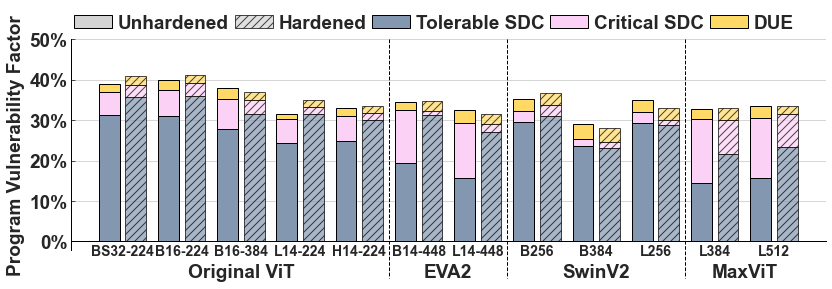

In [11]:
plot_figure("Ampere")

['Original ViT' 'EVA2' 'SwinV2' 'MaxViT']
[ 0 10 20 30 40 50]
PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `/home/fernando/git_research/date_2024_vits/fig/pvf_pascal.pdf'.


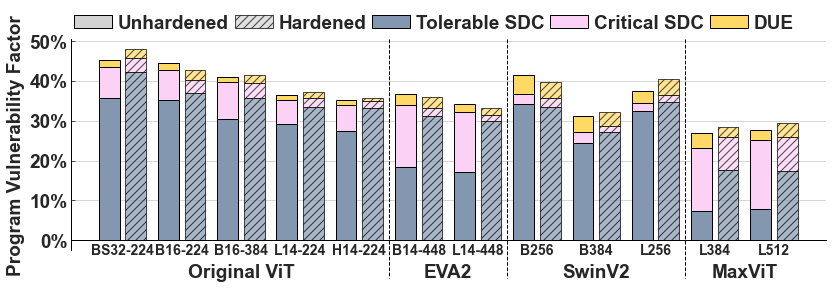

In [12]:
plot_figure("Pascal")

## Paper result section stats

In [13]:
# DUE %
(model_grouped["DUE"].sum() / model_grouped["#faults"].sum()) * 100

2.5154761904761904

In [14]:
# SDC %
calc_average = model_grouped.loc[pd.IndexSlice[:, :, :, "Unhardened"]].droplevel("hardening").groupby(["board", "family"]).sum()

In [15]:
calc_average

SDC  critical_SDC  DUE  #faults  PVF Tolerable SDC  \
board  family                                                              
Ampere Original ViT  2442           551  186     8750           1.395429   
       EVA2           616           464   94     3500           0.352000   
       SwinV2        1445           124  167     5250           0.825714   
       MaxViT         528           540   92     3500           0.301714   
Pascal Original ViT  2768           642  134     8750           1.581714   
       EVA2           619           541   83     3500           0.353714   
       SwinV2        1594           128  206     5250           0.910857   
       MaxViT         264           584  109     3500           0.150857   

                     PVF Critical SDC   PVF DUE  
board  family                                    
Ampere Original ViT          0.314857  0.106286  
       EVA2                  0.265143  0.053714  
       SwinV2                0.070857  0.095429  
       MaxViT                0.308571  0.052571  
Pascal Original ViT          0.366857  0.076571  
       EVA2                  0.309143  0.047429  
       SwinV2                0.073143  0.117714  
       MaxViT                0.333714  0.062286

In [16]:
t1 = (calc_average["SDC"] + calc_average["critical_SDC"]) / calc_average["#faults"]

In [17]:
calc_average_pvf = model_grouped.loc[pd.IndexSlice[:, :, :, "Unhardened"]].droplevel("hardening")
calc_average_pvf["PVF SDC"] = calc_average_pvf["PVF Tolerable SDC"] + calc_average_pvf["PVF Critical SDC"] 
t2 = calc_average_pvf.groupby(["board", "family"]).mean()["PVF SDC"]

In [18]:
t1 - t2

board   family      
Ampere  Original ViT    0.000000e+00
        EVA2           -5.551115e-17
        SwinV2          0.000000e+00
        MaxViT          0.000000e+00
Pascal  Original ViT    0.000000e+00
        EVA2            0.000000e+00
        SwinV2          0.000000e+00
        MaxViT          2.775558e-17
dtype: float64

In [19]:
t1

board   family      
Ampere  Original ViT    0.342057
        EVA2            0.308571
        SwinV2          0.298857
        MaxViT          0.305143
Pascal  Original ViT    0.389714
        EVA2            0.331429
        SwinV2          0.328000
        MaxViT          0.242286
dtype: float64

In [37]:
model_grouped

SDC  critical_SDC  DUE  #faults  \
board  family       config   hardening                                     
Ampere Original ViT BS32-224 Unhardened  547            99   36     1750   
                             Hardened    626            52   38     1750   
                    B16-224  Unhardened  545           112   43     1750   
                             Hardened    632            56   35     1750   
                    B16-384  Unhardened  486           133   45     1750   
                             Hardened    552            61   35     1750   
                    L14-224  Unhardened  428           101   25     1750   
                             Hardened    550            31   31     1750   
                    H14-224  Unhardened  436           106   37     1750   
                             Hardened    526            29   32     1750   
       EVA2         B14-448  Unhardened  342           226   35     1750   
                             Hardened    546            21   40     1750   
                    L14-448  Unhardened  274           238   59     1750   
                             Hardened    472            37   44     1750   
       SwinV2       B256     Unhardened  516            48   53     1750   
                             Hardened    544            48   50     1750   
                    B384     Unhardened  415            28   65     1750   
                             Hardened    403            28   62     1750   
                    L256     Unhardened  514            48   49     1750   
                             Hardened    503            23   51     1750   
       MaxViT       L384     Unhardened  255           277   42     1750   
                             Hardened    379           149   50     1750   
                    L512     Unhardened  273           263   50     1750   
                             Hardened    407           143   35     1750   
Pascal Original ViT BS32-224 Unhardened  625           136   30     1750   
                             Hardened    738            62   40     1750   
                    B16-224  Unhardened  616           130   34     1750   
                             Hardened    645            57   45     1750   
                    B16-384  Unhardened  534           159   26     1750   
                             Hardened    627            62   35     1750   
                    L14-224  Unhardened  511           107   22     1750   
                             Hardened    584            39   26     1750   
                    H14-224  Unhardened  482           110   22     1750   
                             Hardened    581            30   13     1750   
       EVA2         B14-448  Unhardened  321           275   48     1750   
                             Hardened    546            33   50     1750   
                    L14-448  Unhardened  298           266   35     1750   
                             Hardened    523            25   31     1750   
       SwinV2       B256     Unhardened  599            44   84     1750   
                             Hardened    585            41   69     1750   
                    B384     Unhardened  428            46   73     1750   
                             Hardened    474            30   59     1750   
                    L256     Unhardened  567            38   49     1750   
                             Hardened    609            31   67     1750   
       MaxViT       L384     Unhardened  128           278   65     1750   
                             Hardened    309           143   44     1750   
                    L512     Unhardened  136           306   44     1750   
                             Hardened    304           149   60     1750   

                                         PVF Tolerable SDC  PVF Critical SDC  \
board  family       config   hardening                                         
Ampere Original ViT BS32-224 Unhardened           0.312571          0.056571   


In [20]:
model_grouped[["PVF DUE"]].groupby(["board", "family", "hardening"]).describe()

PVF DUE                                \
                                 count      mean       std       min   
board  family       hardening                                          
Ampere Original ViT Unhardened     5.0  0.021257  0.004470  0.014286   
                    Hardened       5.0  0.019543  0.001586  0.017714   
       EVA2         Unhardened     2.0  0.026857  0.009697  0.020000   
                    Hardened       2.0  0.024000  0.001616  0.022857   
       SwinV2       Unhardened     3.0  0.031810  0.004758  0.028000   
                    Hardened       3.0  0.031048  0.003805  0.028571   
       MaxViT       Unhardened     2.0  0.026286  0.003232  0.024000   
                    Hardened       2.0  0.024286  0.006061  0.020000   
Pascal Original ViT Unhardened     5.0  0.015314  0.002980  0.012571   
                    Hardened       5.0  0.018171  0.007221  0.007429   
       EVA2         Unhardened     2.0  0.023714  0.005253  0.020000   
                    Hardened       2.0  0.023143  0.007677  0.017714   
       SwinV2       Unhardened     3.0  0.039238  0.010227  0.028000   
                    Hardened       3.0  0.037143  0.003024  0.033714   
       MaxViT       Unhardened     2.0  0.031143  0.008485  0.025143   
                    Hardened       2.0  0.029714  0.006465  0.025143   

                                                                        
                                     25%       50%       75%       max  
board  family       hardening                                           
Ampere Original ViT Unhardened  0.020571  0.021143  0.024571  0.025714  
                    Hardened    0.018286  0.020000  0.020000  0.021714  
       EVA2         Unhardened  0.023429  0.026857  0.030286  0.033714  
                    Hardened    0.023429  0.024000  0.024571  0.025143  
       SwinV2       Unhardened  0.029143  0.030286  0.033714  0.037143  
                    Hardened    0.028857  0.029143  0.032286  0.035429  
       MaxViT       Unhardened  0.025143  0.026286  0.027429  0.028571  
                    Hardened    0.022143  0.024286  0.026429  0.028571  
Pascal Original ViT Unhardened  0.012571  0.014857  0.017143  0.019429  
                    Hardened    0.014857  0.020000  0.022857  0.025714  
       EVA2         Unhardened  0.021857  0.023714  0.025571  0.027429  
                    Hardened    0.020429  0.023143  0.025857  0.028571  
       SwinV2       Unhardened  0.034857  0.041714  0.044857  0.048000  
                    Hardened    0.036000  0.038286  0.038857  0.039429  
       MaxViT       Unhardened  0.028143  0.031143  0.034143  0.037143  
                    Hardened    0.027429  0.029714  0.032000  0.034286

In [45]:
model_grouped.loc[pd.IndexSlice[:, : , :, "Unhardened"], "PVF DUE"].mean() * 100, model_grouped.loc[pd.IndexSlice[:, : , :, "Hardened"], "PVF DUE"].mean() * 100

(2.5500000000000007, 2.480952380952381)

In [22]:
crit_hard = model_grouped.loc[pd.IndexSlice[:, :, :, "Hardened"], "critical_SDC"].droplevel("hardening")
crit_unhd = model_grouped.loc[pd.IndexSlice[:, :, :, "Unhardened"], "critical_SDC"].droplevel("hardening")

In [23]:
model_grouped.loc[model_grouped.loc[pd.IndexSlice[:, :, :,"Hardened"], "PVF Critical SDC"].idxmin()]


SDC                   546.000000
critical_SDC           21.000000
DUE                    40.000000
#faults              1750.000000
PVF Tolerable SDC       0.312000
PVF Critical SDC        0.012000
PVF DUE                 0.022857
Name: (Ampere, EVA2, B14-448, Hardened), dtype: float64

In [24]:
model_grouped.loc[("Ampere", "EVA2", "B14-448", "Unhardened")]

SDC                   342.000000
critical_SDC          226.000000
DUE                    35.000000
#faults              1750.000000
PVF Tolerable SDC       0.195429
PVF Critical SDC        0.129143
PVF DUE                 0.020000
Name: (Ampere, EVA2, B14-448, Unhardened), dtype: float64

In [25]:
0.129143/0.012000

10.761916666666668

In [26]:
red = crit_unhd / crit_hard

In [27]:
red.mean()

3.2595558191885208

In [28]:
red

board   family        config  
Ampere  Original ViT  BS32-224     1.903846
                      B16-224      2.000000
                      B16-384      2.180328
                      L14-224      3.258065
                      H14-224      3.655172
        EVA2          B14-448     10.761905
                      L14-448      6.432432
        SwinV2        B256         1.000000
                      B384         1.000000
                      L256         2.086957
        MaxViT        L384         1.859060
                      L512         1.839161
Pascal  Original ViT  BS32-224     2.193548
                      B16-224      2.280702
                      B16-384      2.564516
                      L14-224      2.743590
                      H14-224      3.666667
        EVA2          B14-448      8.333333
                      L14-448     10.640000
        SwinV2        B256         1.073171
                      B384         1.533333
                      L256         1.225806
 

In [29]:
crit_unhd_pct = (crit_unhd / 1750) * 100
crit_hard_pct = (crit_hard / 1750) * 100

In [30]:
crit_unhd_pct.mean(), crit_hard_pct.mean()

(8.509523809523808, 3.285714285714286)

In [31]:
eva_max = (crit_hard / 1750).groupby(["board", "family"]).mean() * 100

In [32]:
eva_max

board   family      
Ampere  Original ViT    2.617143
        EVA2            1.657143
        SwinV2          1.885714
        MaxViT          8.342857
Pascal  Original ViT    2.857143
        EVA2            1.657143
        SwinV2          1.942857
        MaxViT          8.342857
Name: critical_SDC, dtype: float64

In [33]:
eva_max_un = (crit_unhd / 1750).groupby(["board", "family"]).mean() * 100


In [34]:
eva_max_un

board   family      
Ampere  Original ViT     6.297143
        EVA2            13.257143
        SwinV2           2.361905
        MaxViT          15.428571
Pascal  Original ViT     7.337143
        EVA2            15.457143
        SwinV2           2.438095
        MaxViT          16.685714
Name: critical_SDC, dtype: float64

In [35]:
eva_max_un/eva_max

board   family      
Ampere  Original ViT    2.406114
        EVA2            8.000000
        SwinV2          1.252525
        MaxViT          1.849315
Pascal  Original ViT    2.568000
        EVA2            9.327586
        SwinV2          1.254902
        MaxViT          2.000000
Name: critical_SDC, dtype: float64

In [36]:
eva_max / eva_max_un

board   family      
Ampere  Original ViT    0.415608
        EVA2            0.125000
        SwinV2          0.798387
        MaxViT          0.540741
Pascal  Original ViT    0.389408
        EVA2            0.107209
        SwinV2          0.796875
        MaxViT          0.500000
Name: critical_SDC, dtype: float64